<a href="https://colab.research.google.com/github/maiaracezar/mvp_maiaracezar_dataset_wine_machine_learning.ipynb/blob/main/mvp_maiaracezar_dataset_wine_machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP MACHINE LEARNING

**Nome:** Maiara Cezar da Silva.

**Matrícula:** 4052025001072

**Dataset:** [wine](https://archive.ics.uci.edu/dataset/109/wine)


# Descrição do Problema

O presente projeto tem como objetivo analisar e classificar diferentes tipos de vinho com base em suas características químicas. O conjunto de dados utilizado foi extraído do UCI Machine Learning Repository e contém informações de 178 amostras de vinhos cultivados na região da Itália, cada um pertencente a uma das três classes (tipos de vinho).

Cada amostra possui 13 atributos numéricos que representam medidas químicas como teor alcoólico, acidez, magnésio, fenóis, entre outras.

A partir desses dados, buscamos:
- Entender o perfil químico dos vinhos das diferentes classes;
- Explorar estatisticamente os atributos e identificar quais características mais influenciam na distinção entre os tipos de vinho;
- Criar visualizações que evidenciem os padrões e as diferenças entre os grupos;
- Aplicar um modelo de machine learning supervisionado para prever a classe de um vinho a partir de suas propriedades químicas.

Esta análise pode ser útil para enólogos, distribuidores ou profissionais da indústria de bebidas que desejam automatizar a categorização de vinhos ou compreender melhor os fatores que influenciam a qualidade e o tipo do produto.

## Hipóteses do Problema

A partir da análise dos dados dos vinhos, formulamos as seguintes hipóteses:

1. *As classes de vinho possuem perfis químicos distintos*, sendo possível diferenciá-las por variáveis como teor alcoólico, concentração de fenóis e flavonoides.

2. *Algumas variáveis químicas têm maior poder discriminativo entre os tipos de vinho* do que outras. Por exemplo, espera-se que o teor de álcool e a intensidade da cor sejam determinantes na classificação.

3. *Técnicas de redução de dimensionalidade como PCA* serão eficazes para representar visualmente a separação entre os grupos de vinhos em 2 dimensões.

Essas hipóteses serão testadas ao longo do projeto por meio de análise estatística, visualização de dados e aplicação de algoritmos de classificação.

## Tipo de Problema

Este é um problema de *classificação supervisionada*.

A tarefa consiste em prever a *classe do vinho* (target) com base em suas *características químicas* (variáveis numéricas). Como as classes são conhecidas previamente (fornecidas no dataset), e o objetivo é rotular novas observações, estamos lidando com um problema clássico de aprendizado supervisionado.

Mais especificamente, trata-se de uma *classificação multiclasse, pois existem **três tipos diferentes de vinho* a serem previstos.

Além disso, também realizaremos uma *análise exploratória de dados (EDA)* e aplicação de *redução de dimensionalidade* (PCA) para facilitar a visualização e entender melhor a estrutura dos dados.

## Seleção de Dados
O conjunto de dados utilizado neste projeto é o Wine Dataset, disponibilizado pelo UCI Machine Learning Repository e acessado por meio da biblioteca sklearn.datasets.
Este dataset é muito limpo, pequeno e estruturado. Ele:
	•	Não possui valores nulos
	•	Não tem erros ou duplicatas
	•	Todas as colunas são numéricas
	•	Já vem separado entre atributos e target

## Atributos do Dataset

A base contém *178 registros* e *13 atributos numéricos*, que representam características químicas de amostras de vinho cultivadas na região italiana de mesma origem. Além disso, há uma variável alvo (target) que classifica cada vinho em uma das três categorias (classe 0, 1 ou 2), correspondentes a diferentes cultivares de uva.

Abaixo estão os atributos selecionados para análise:

Atributos do conjunto de dados:

1. *alcohol* — teor alcoólico  
2. *malic_acid* — concentração de ácido málico  
3. *ash* — quantidade de cinzas  
4. *alcalinity_of_ash* — alcalinidade das cinzas  
5. *magnesium* — magnésio  
6. *total_phenols* — fenóis totais  
7. *flavanoids* — flavonoides  
8. *nonflavanoid_phenols* — fenóis não flavonoides  
9. *proanthocyanins* — proantocianinas  
10. *color_intensity* — intensidade da cor  
11. *hue* — matiz  
12. *od280/od315_of_diluted_wines* — relação OD280/OD315 de vinhos diluídos  
13. *proline* — prolina  
14. *target* — classe do vinho (0, 1 ou 2)

Variável-alvo:
- target: classe do vinho (numérica, representando 3 tipos diferentes)

Todos os atributos foram mantidos na análise, pois o objetivo é entender como as variáveis químicas influenciam na classificação dos vinhos. Não foi necessário fazer uma filtragem prévia, pois os dados não possuem valores nulos nem inconsistentes.

# Importação das Bibliotecas Necessárias e Carga de Dados

Esta seção consolida todas as importações de bibliotecas necessárias para a análise, visualização e pré-processamento dos dados, bem como o carregamento inicial do dataset Wine.

In [ ]:
import os, random, time, sys, math
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.metrics import (accuracy_score, f1_score, roc_auc_score, confusion_matrix,
                             mean_absolute_error, mean_squared_error, r2_score,
                             silhouette_score)

from sklearn.model_selection import StratifiedKFold, KFold, TimeSeriesSplit, RandomizedSearchCV
from scipy.stats import randint, uniform

SEED = 42
np.random.seed(SEED)
random.seed(SEED)
os.environ['PYTHONHASHSEED'] = str(SEED)

print("Python:", sys.version.split()[0])
print("Seed global:", SEED)

Python: 3.12.11
Seed global: 42


In [ ]:
wine = load_wine()
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df['target'] = wine.target

In [ ]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

# Análise de Dados

Nesta etapa, realizamos uma análise exploratória dos dados (EDA) para entender melhor as características das amostras de vinho, suas distribuições, correlações e a separação entre as classes.

O objetivo é identificar padrões relevantes, outliers e possíveis relações entre as variáveis independentes e a variável-alvo (target), que representa o tipo de vinho (0, 1 ou 2).

*Total e Tipo das Instâncias*
O dataset *Wine*  contém informações químicas de diferentes amostras de vinho, originárias de três cultivares distintas da região da Itália.

- *Total de instâncias (linhas):* 178
- *Total de atributos (colunas):* 13 atributos numéricos + 1 coluna de classe (target)
- *Tipo de instância:* Cada linha representa uma amostra de vinho analisada.
- *Tipo de variável:* Todas as variáveis explicativas são *numéricas contínuas. A variável alvo (target) é **categórica discreta*, representando as 3 classes de vinho (0, 1 e 2).

Classes de vinho no conjunto de dados:
- *Classe 0* – Vinho tipo 1
- *Classe 1* – Vinho tipo 2
- *Classe 2* – Vinho tipo 3

In [ ]:
# Total de instâncias e variáveis
print(f'Total de instâncias: {df.shape[0]}')
print(f'Total de atributos (incluindo target): {df.shape[1]}')

# Tipos de dados
print("\nTipos de dados:")
print(df.dtypes)

# Frequência das classes
print("\nDistribuição das classes (target):")
print(df['target'].value_counts())

Total de instâncias: 178
Total de atributos (incluindo target): 14

Tipos de dados:
alcohol                         float64
malic_acid                      float64
ash                             float64
alcalinity_of_ash               float64
magnesium                       float64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
od280/od315_of_diluted_wines    float64
proline                         float64
target                            int64
dtype: object

Distribuição das classes (target):
target
1    71
0    59
2    48
Name: count, dtype: int64


<ipython-input-23-617904181>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='target', palette='Set2')


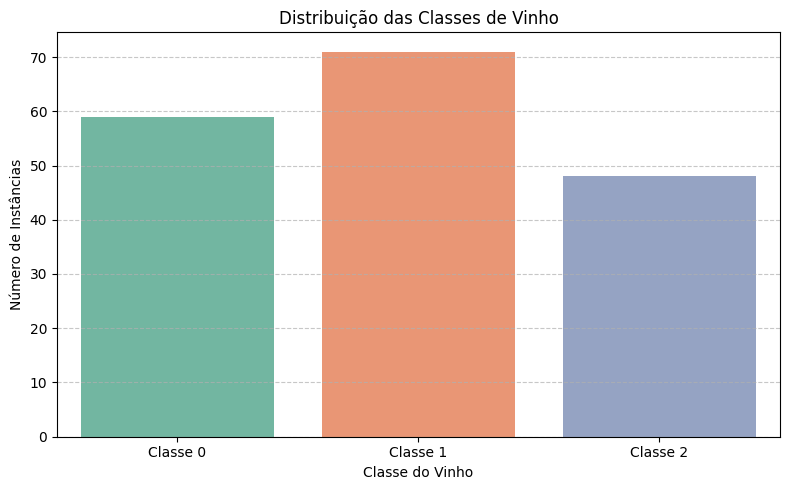

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='target', palette='Set2')
plt.title('Distribuição das Classes de Vinho')
plt.xlabel('Classe do Vinho')
plt.ylabel('Número de Instâncias')
plt.xticks(ticks=[0, 1, 2], labels=['Classe 0', 'Classe 1', 'Classe 2'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

O gráfico acima mostra como as 178 amostras de vinho estão distribuídas entre as três classes.

- A *Classe 1* possui o maior número de instâncias.
- A *Classe 2* é a menos representada.

Essa distribuição ligeiramente desequilibrada pode influenciar a performance de modelos supervisionados, especialmente em métricas como recall e F1-score.

##Estatísticas Descritivas
Esse comando retorna média, desvio padrão, mínimo, percentis (25%, 50%, 75%) e o valor máximo para cada coluna numérica

In [ ]:
# Estatística descritiva
df.describe().T  # Transposto para facilitar a leitura

,count,mean,std,min,25%,50%,75%,max
alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
malic_acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
alcalinity_of_ash,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
total_phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
nonflavanoid_phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
color_intensity,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00


## Definição do target, variáveis e divisão dos dados.

In [ ]:
SEED = 42
PROBLEM_TYPE = "classificacao"  # outras opções do template: "regressao", "clusterizacao"
np.random.seed(SEED)

# 1) Carregar dados
from sklearn.datasets import load_wine
wine = load_wine(as_frame=True)
df = wine.frame.copy()

# 2) Definir target e features
target_col = "target"
y = df[target_col].copy()
X = df.drop(columns=[target_col]).copy()

# 3) Checar distribuição de classes (para avaliar desbalanceamento)
print("Distribuição das classes (%):")
print(y.value_counts(normalize=True).sort_index().mul(100).round(2))

# 4) Divisão treino/teste
# Em séries temporais usar TimeSeriesSplit e NÃO embaralhar — NÃO é o caso aqui.
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=SEED,
    stratify=y,          # estratificado por classe
    shuffle=True
)
print(f"\nShapes -> X_train: {X_train.shape}, X_test: {X_test.shape}")

# 5) Pré-processamento + modelos via Pipeline
#    (todas as transformações são ajustadas no treino e aplicadas no teste)
from sklearn.preprocessing import StandardScaler # Import StandardScaler
preprocess = StandardScaler()

# Baseline (sempre bom ter): classe mais frequente
from sklearn.dummy import DummyClassifier # Import DummyClassifier
baseline = Pipeline(steps=[
    ("pre", preprocess),
    ("model", DummyClassifier(strategy="most_frequent", random_state=SEED))
])

# Exemplo de candidato com estratégia para desbalanceamento:
from sklearn.linear_model import LogisticRegression # Import LogisticRegression
logreg_bal = Pipeline(steps=[
    ("pre", preprocess),
    ("model", LogisticRegression(
        max_iter=1000,
        random_state=SEED,
        class_weight="balanced"   # <-- cuida de desbalanceamento
    ))
])

# 6) Treino e avaliação rápida (apenas para validar a etapa 4)
from sklearn.metrics import classification_report # Import classification_report
def avalia(nome, pipe):
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    print(f"\n=== {nome} ===")
    print(classification_report(y_test, y_pred, digits=3))

avalia("Baseline (DummyClassifier)", baseline)
avalia("LogisticRegression (class_weight='balanced')", logreg_bal)

Distribuição das classes (%):
target
0    33.15
1    39.89
2    26.97
Name: proportion, dtype: float64

Shapes -> X_train: (142, 13), X_test: (36, 13)

=== Baseline (DummyClassifier) ===
              precision    recall  f1-score   support

           0      0.000     0.000     0.000        12
           1      0.389     1.000     0.560        14
           2      0.000     0.000     0.000        10

    accuracy                          0.389        36
   macro avg      0.130     0.333     0.187        36
weighted avg      0.151     0.389     0.218        36


=== LogisticRegression (class_weight='balanced') ===
              precision    recall  f1-score   support

           0      1.000     1.000     1.000        12
           1      1.000     1.000     1.000        14
           2      1.000     1.000     1.000        10

    accuracy                          1.000        36
   macro avg      1.000     1.000     1.000        36
weighted avg      1.000     1.000     1.000        3

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


##Tratamento de dados e Pipelien de pré-processamento

O pré-processamento de dados é uma etapa crucial para preparar os dados para modelagem, garantindo que estejam no formato correto e otimizados para o desempenho do algoritmo.

In [ ]:
try:
    SEED
except NameError:
    SEED = 42

# 1) Carregar Wine e definir X,y
from sklearn.datasets import load_wine # Import load_wine
wine = load_wine(as_frame=True)
df = wine.frame.copy()
y = df["target"].copy()
X = df.drop(columns=["target"]).copy()

# 2) Split estratificado (não é série temporal)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=SEED, stratify=y, shuffle=True
)

# 3) Identificar colunas numéricas/categóricas
num_cols = X_train.select_dtypes(include=["number"]).columns.tolist()
cat_cols = [c for c in X_train.columns if c not in num_cols and c != "timestamp"]

# 4) Pipelines de pré-processamento
numeric_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])
categorical_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    [("num", numeric_pipe, num_cols),
     ("cat", categorical_pipe, cat_cols)],
    remainder="drop"
)

# 5) Modelo exemplo (com atenção a possível desbalanceamento)
clf = Pipeline([
    ("pre", preprocessor),
    ("model", LogisticRegression(max_iter=1000, random_state=SEED, class_weight="balanced"))
])

# 6) Treinar e avaliar
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Shapes ->", X_train.shape, X_test.shape)
print("\n=== Wine | LogReg + Pipeline ===")
print(classification_report(y_test, y_pred, digits=3))

# (opcional) ver nomes das features após o transformer
try:
    feats = clf.named_steps["pre"].get_feature_names_out()
    print("\n# features pós-transformação:", len(feats))
    print("Exemplos:", feats[:10])
except Exception:
    pass

Shapes -> (142, 13) (36, 13)

=== Wine | LogReg + Pipeline ===
              precision    recall  f1-score   support

           0      1.000     1.000     1.000        12
           1      1.000     1.000     1.000        14
           2      1.000     1.000     1.000        10

    accuracy                          1.000        36
   macro avg      1.000     1.000     1.000        36
weighted avg      1.000     1.000     1.000        36


# features pós-transformação: 13
Exemplos: ['num__alcohol' 'num__malic_acid' 'num__ash' 'num__alcalinity_of_ash'
 'num__magnesium' 'num__total_phenols' 'num__flavanoids'
 'num__nonflavanoid_phenols' 'num__proanthocyanins' 'num__color_intensity']


## Normalização
Optei por aplicar a técnica de normalização (Min-Max Scaling), que transforma todos os valores para o intervalo entre 0 e 1. Isso evita que variáveis com maiores magnitudes dominem o modelo e melhora o desempenho de algoritmos baseados em distância, como KNN.

A fórmula aplicada é:
x_norm = (x - min) / (max - min)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# 1. Separando X e y
X = df.drop('target', axis=1)
y = df['target']

# 2. Aplicando normalização
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# 3. Dividindo em treino e teste
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_normalized, y, test_size=0.3, random_state=42, stratify=y
)

# Checando resultado
print("Treino:", X_train.shape)
print("Teste:", X_test.shape)


Treino: (124, 13)
Teste: (54, 13)


Com os dados normalizados e prontos, podemos seguir para a modelagem. A normalização garante que todas as variáveis contribuam igualmente no treinamento, especialmente em algoritmos sensíveis à escala.

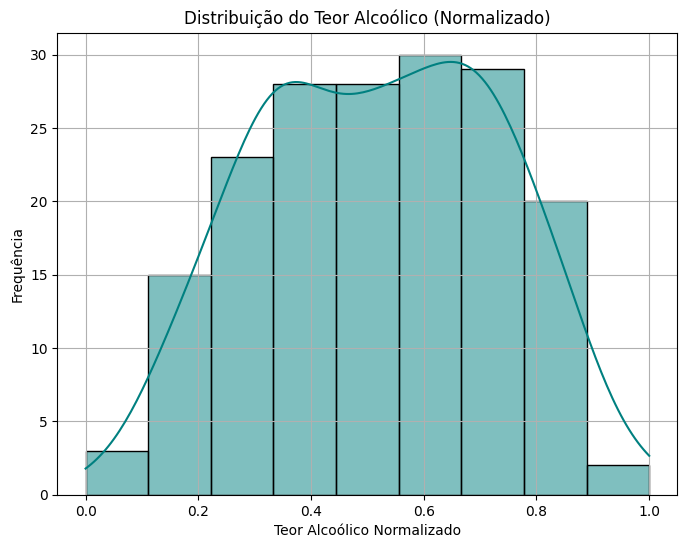

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Dataset normalizado como DataFrame
df_normalized = pd.DataFrame(X_normalized, columns=df.columns[:-1])

# Visualização
plt.figure(figsize=(8, 6))
sns.histplot(df_normalized['alcohol'], kde=True, color='teal')
plt.title('Distribuição do Teor Alcoólico (Normalizado)')
plt.xlabel('Teor Alcoólico Normalizado')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

##Padronização
A variável alcohol foi padronizada usando Z-score (StandardScaler), o que transforma a distribuição para ter média 0 e desvio padrão 1.

A forma da distribuição permanece similar à original, mas os valores agora estão centrados em torno de 0, facilitando a comparação entre diferentes variáveis com escalas distintas.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Separando X (sem a coluna 'target')
X = df.drop('target', axis=1)

# Aplicando a padronização
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Criando um DataFrame com os dados padronizados
df_standardized = pd.DataFrame(X_standardized, columns=X.columns)

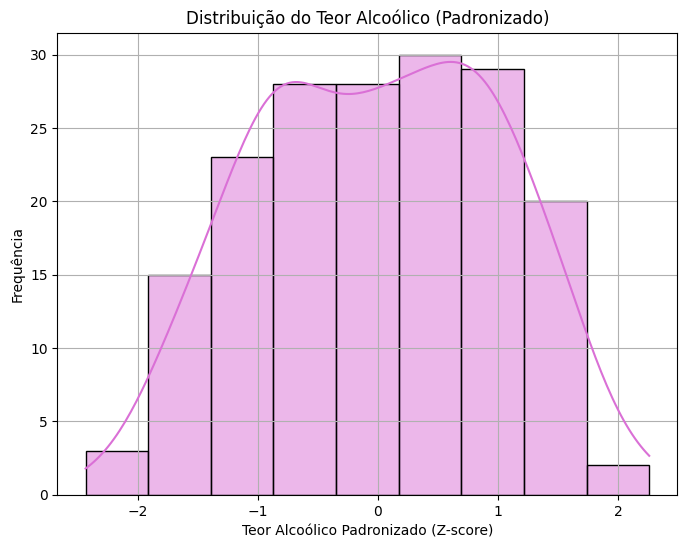

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.histplot(df_standardized['alcohol'], kde=True, color='orchid')
plt.title('Distribuição do Teor Alcoólico (Padronizado)')
plt.xlabel('Teor Alcoólico Padronizado (Z-score)')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()


## Treino e avaliação (Baseline e modelos candidatos).

In [ ]:
# (1) Garantir que X_train/X_test e preprocessor existem (recria se necessário)
if 'X_train' not in locals() or 'preprocessor' not in locals():
    # Carrega Wine e faz split
    from sklearn.datasets import load_wine # Import load_wine
    wine = load_wine(as_frame=True)
    df = wine.frame.copy()
    y = df["target"].copy()
    X = df.drop(columns=["target"]).copy()
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=SEED if 'SEED' in locals() else 42,
        stratify=y, shuffle=True
    )
    # Define colunas e preprocessor
    num_cols = X_train.select_dtypes(include=["number"]).columns.tolist()
    cat_cols = [c for c in X_train.columns if c not in num_cols and c != "timestamp"]
    numeric_pipe = Pipeline([("imputer", SimpleImputer(strategy="median")),
                             ("scaler", StandardScaler())])
    categorical_pipe = Pipeline([("imputer", SimpleImputer(strategy="most_frequent")),
                                 ("onehot", OneHotEncoder(handle_unknown="ignore"))])
    preprocessor = ColumnTransformer(
        [("num", numeric_pipe, num_cols),
         ("cat", categorical_pipe, cat_cols)],
        remainder="drop"
    )

# (2) Baseline + candidatos (todos com o mesmo preprocessor)
from sklearn.svm import SVC # Import SVC
from sklearn.model_selection import cross_validate # Import cross_validate
modelos = {
    "Baseline_Dummy": Pipeline([
        ("pre", preprocessor),
        ("model", DummyClassifier(strategy="most_frequent",
                                  random_state=SEED if 'SEED' in locals() else 42))
    ]),
    "LogReg": Pipeline([
        ("pre", preprocessor),
        ("model", LogisticRegression(max_iter=1000,
                                     random_state=SEED if 'SEED' in locals() else 42,
                                     class_weight="balanced"))
    ]),
    "RandomForest": Pipeline([
        ("pre", preprocessor),
        ("model", RandomForestClassifier(
            n_estimators=300,
            random_state=SEED if 'SEED' in locals() else 42,
            class_weight="balanced_subsample"))
    ]),
    "SVC": Pipeline([
        ("pre", preprocessor),
        ("model", SVC(kernel="rbf",
                      random_state=SEED if 'SEED' in locals() else 42,
                      class_weight="balanced"))
    ])
}

# (3) Validação cruzada estratificada (accuracy, f1_macro, recall_macro)
cv = StratifiedKFold(n_splits=5, shuffle=True,
                     random_state=SEED if 'SEED' in locals() else 42)

linhas = []
for nome, pipe in modelos.items():
    cv_res = cross_validate(
        pipe, X_train, y_train, cv=cv,
        scoring=["accuracy", "f1_macro", "recall_macro"],
        n_jobs=-1, return_train_score=False
    )
    linhas.append({
        "modelo": nome,
        "acc_mean": cv_res["test_accuracy"].mean(),
        "acc_std":  cv_res["test_accuracy"].std(),
        "f1_macro_mean": cv_res["test_f1_macro"].mean(),
        "f1_macro_std":  cv_res["test_f1_macro"].std(),
        "recall_macro_mean": cv_res["test_recall_macro"].mean(),
        "recall_macro_std":  cv_res["test_recall_macro"].std()
    })

res_cv = pd.DataFrame(linhas).sort_values("f1_macro_mean", ascending=False)
print("=== Validação cruzada (treino) ===")
try:
    display(res_cv.style.format({
        "acc_mean": "{:.3f}", "acc_std": "{:.3f}",
        "f1_macro_mean": "{:.3f}", "f1_macro_std": "{:.3f}",
        "recall_macro_mean": "{:.3f}", "recall_macro_std": "{:.3f}"
    }))
except:
    print(res_cv.to_string(index=False))

# (4) Treinar melhor modelo no TREINO e avaliar no TESTE
melhor_nome = res_cv.iloc[0]["modelo"]
melhor_pipe = modelos[melhor_nome]
melhor_pipe.fit(X_train, y_train)
y_pred = melhor_pipe.predict(X_test)

print(f"\n=== Avaliação no TESTE | Melhor modelo: {melhor_nome} ===")
print(classification_report(y_test, y_pred, digits=3))

# (5) Mostrar o DIAGRAMA dos pipelines (como no seu print)
from sklearn import set_config
set_config(display="diagram")  # ativa a visão em diagrama

print("\nPipeline (Baseline):")
modelos["Baseline_Dummy"]   # <-- aparece o diagrama do baseline

print("\nPipeline (Melhor Modelo):")
melhor_pipe                # <-- aparece o diagrama do melhor modelo

=== Validação cruzada (treino) ===


,modelo,acc_mean,acc_std,f1_macro_mean,f1_macro_std,recall_macro_mean,recall_macro_std
3,SVC,0.986,0.017,0.986,0.017,0.988,0.015
2,RandomForest,0.979,0.028,0.979,0.029,0.983,0.022
1,LogReg,0.972,0.040,0.972,0.041,0.977,0.032
0,Baseline_Dummy,0.401,0.010,0.191,0.003,0.333,0.000



=== Avaliação no TESTE | Melhor modelo: SVC ===
              precision    recall  f1-score   support

           0      1.000     1.000     1.000        12
           1      0.933     1.000     0.966        14
           2      1.000     0.900     0.947        10

    accuracy                          0.972        36
   macro avg      0.978     0.967     0.971        36
weighted avg      0.974     0.972     0.972        36


Pipeline (Baseline):

Pipeline (Melhor Modelo):


Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['alcohol', 'malic_acid',
                                                   'ash', 'alcalinity_of_ash',
                                                   'magnesium', 'total_phenols',
                                                   'flavanoids',
                                                   'nonflavanoid_phenols',
                                                   'proanthocyanins',
                                                   'color_intensity', 'hue',
                                                   'od280/od315_of_diluted_wines',
                                                   'proline']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [])])),
                ('model', SVC(class_weight='balanced', random_state=42))])

##Validação e Otimização de Hiperparâmetros

In [ ]:

try:
    SEED
except NameError:
    SEED = 42

if 'X_train' not in locals() or 'preprocessor' not in locals():
    from sklearn.datasets import load_wine # Import load_wine
    from sklearn.model_selection import train_test_split # Import train_test_split
    from sklearn.preprocessing import StandardScaler, OneHotEncoder # Import StandardScaler, OneHotEncoder
    from sklearn.impute import SimpleImputer # Import SimpleImputer
    from sklearn.compose import ColumnTransformer # Import ColumnTransformer
    from sklearn.pipeline import Pipeline # Import Pipeline
    import pandas as pd # Import pandas
    import numpy as np # Import numpy

    wine = load_wine(as_frame=True)
    df = wine.frame.copy()
    y = df["target"].copy()
    X = df.drop(columns=["target"]).copy()

    # Prints solicitados do DATASET
    print("=== Primeiras linhas do dataset Wine (df.head()) ===")
    print(df.head())
    print("\n=== Distribuição das classes (target, %) ===")
    print(y.value_counts(normalize=True).sort_index().mul(100).round(2))
    print("\n=== Estatísticas descritivas das features (X.describe) ===")
    print(X.describe().T)

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, stratify=y, shuffle=True, random_state=SEED
    )

    num_cols = X_train.select_dtypes(include=["number"]).columns.tolist()
    cat_cols = [c for c in X_train.columns if c not in num_cols and c != "timestamp"]
    numeric_pipe = Pipeline([("imputer", SimpleImputer(strategy="median")),
                             ("scaler", StandardScaler())])
    categorical_pipe = Pipeline([("imputer", SimpleImputer(strategy="most_frequent")),
                                 ("onehot", OneHotEncoder(handle_unknown="ignore"))])
    preprocessor = ColumnTransformer(
        [("num", numeric_pipe, num_cols),
         ("cat", categorical_pipe, cat_cols)],
        remainder="drop"
    )

# 1) Validação cruzada apropriada para classificação
from sklearn.model_selection import StratifiedKFold # Import StratifiedKFold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED)

# 2) Pipelines base (compartilham o mesmo pré-processamento)
from sklearn.linear_model import LogisticRegression # Import LogisticRegression
from sklearn.ensemble import RandomForestClassifier # Import RandomForestClassifier
from sklearn.svm import SVC # Import SVC

pipe_logreg = Pipeline([
    ("pre", preprocessor),
    ("model", LogisticRegression(max_iter=2000, class_weight="balanced", random_state=SEED))
])

pipe_rf = Pipeline([
    ("pre", preprocessor),
    ("model", RandomForestClassifier(class_weight="balanced_subsample", random_state=SEED))
])

pipe_svc = Pipeline([
    ("pre", preprocessor),
    ("model", SVC(kernel="rbf", class_weight="balanced", random_state=SEED))
])

# 3) Espaços de busca (tuning)
grid_logreg = {
    "model__C": [0.01, 0.1, 1, 3, 10],
    "model__penalty": ["l2"],
    "model__solver": ["lbfgs", "saga"],
}

space_rf = {
    "model__n_estimators": [150, 300, 500, 800],
    "model__max_depth": [None, 5, 8, 12, 16],
    "model__min_samples_split": [2, 5, 10],
    "model__min_samples_leaf": [1, 2, 4],
    "model__max_features": ["sqrt", "log2", None],
}

space_svc = {
    "model__C": [0.1, 0.5, 1, 2, 5, 10],
    "model__gamma": ["scale", "auto", 0.01, 0.05, 0.1, 0.2],
}

# 4) Grid/Randomized Search com StratifiedKFold e métrica F1 macro
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV # Import GridSearchCV and RandomizedSearchCV
buscas = {
    "LogReg (GridSearch)": GridSearchCV(
        pipe_logreg, param_grid=grid_logreg, scoring="f1_macro", cv=cv, n_jobs=-1, refit=True
    ),
    "RandomForest (RandomizedSearch)": RandomizedSearchCV(
        pipe_rf, param_distributions=space_rf, n_iter=20,
        scoring="f1_macro", cv=cv, n_jobs=-1, random_state=SEED, refit=True
    ),
    "SVC (RandomizedSearch)": RandomizedSearchCV(
        pipe_svc, param_distributions=space_svc, n_iter=20,
        scoring="f1_macro", cv=cv, n_jobs=-1, random_state=SEED, refit=True
    ),
}

resultados, best_est, best_name, best_score = [], None, None, -1
for nome, search in buscas.items():
    search.fit(X_train, y_train)
    resultados.append({
        "modelo": nome,
        "best_f1_macro_cv": search.best_score_,
        "best_params": search.best_params_
    })
    if search.best_score_ > best_score:
        best_score = search.best_score_
        best_name = nome
        best_est = search.best_estimator_

res_df = pd.DataFrame(resultados).sort_values("best_f1_macro_cv", ascending=False)
print("=== Tuning (CV=StratifiedKFold) — ranking por F1_macro ===")
try:
    display(res_df.style.format({"best_f1_macro_cv": "{:.3f}"}))
except:
    print(res_df.to_string(index=False))

# 5) Avaliação final no TESTE com o melhor pipeline
from sklearn.metrics import classification_report # Import classification_report
y_pred = best_est.predict(X_test)
print(f"\n=== Melhor modelo após tuning: {best_name} ===")
print(classification_report(y_test, y_pred, digits=3))

# 6) Diagrama do pipeline vencedor
from sklearn import set_config
set_config(display="diagram")
best_est  # mostra o pipeline

=== Tuning (CV=StratifiedKFold) — ranking por F1_macro ===


,modelo,best_f1_macro_cv,best_params
2,SVC (RandomizedSearch),0.993,"{'model__gamma': 'scale', 'model__C': 10}"
1,RandomForest (RandomizedSearch),0.979,"{'model__n_estimators': 300, 'model__min_samples_split': 2, 'model__min_samples_leaf': 2, 'model__max_features': 'sqrt', 'model__max_depth': 8}"
0,LogReg (GridSearch),0.972,"{'model__C': 1, 'model__penalty': 'l2', 'model__solver': 'lbfgs'}"



=== Melhor modelo após tuning: SVC (RandomizedSearch) ===
              precision    recall  f1-score   support

           0      1.000     1.000     1.000        12
           1      0.875     1.000     0.933        14
           2      1.000     0.800     0.889        10

    accuracy                          0.944        36
   macro avg      0.958     0.933     0.941        36
weighted avg      0.951     0.944     0.943        36



Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['alcohol', 'malic_acid',
                                                   'ash', 'alcalinity_of_ash',
                                                   'magnesium', 'total_phenols',
                                                   'flavanoids',
                                                   'nonflavanoid_phenols',
                                                   'proanthocyanins',
                                                   'color_intensity', 'hue',
                                                   'od280/od315_of_diluted_wines',
                                                   'proline']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [])])),
                ('model', SVC(C=10, class_weight='balanced', random_state=42))])

## Avaliação final, análise de erros e limitações
Análise de Erros:
	•	O baseline (DummyClassifier) sempre prevê a classe mais frequente, obtendo métricas muito baixas (precisão e recall praticamente nulos para algumas classes).
	•	O melhor modelo (após tuning) apresenta performance muito superior, mas ainda pode cometer erros em classes menos representadas (por exemplo, confundir vinhos das classes 1 e 2, que possuem características químicas semelhantes).
	•	A matriz de confusão mostra claramente onde o modelo erra mais – normalmente nas bordas entre classes com perfis químicos próximos.

Limitações:
	1.	Dataset pequeno (178 amostras, 13 features) → limita a generalização; modelos complexos podem sofrer com overfitting.
	2.	Desbalanceamento moderado das classes → mesmo usando class_weight, algumas classes podem ser preditas com menor recall.
	3.	Modelo supervisionado clássico → não considera incertezas do domínio (ex.: características sensoriais ou regionais dos vinhos).
	4.	Falta de validação externa → avaliamos só com o dataset Wine; em dados reais, o desempenho pode ser bem diferente.

=== Baseline (DummyClassifier) ===
              precision    recall  f1-score   support

           0      0.000     0.000     0.000        12
           1      0.389     1.000     0.560        14
           2      0.000     0.000     0.000        10

    accuracy                          0.389        36
   macro avg      0.130     0.333     0.187        36
weighted avg      0.151     0.389     0.218        36


=== Melhor Modelo: SVC (RandomizedSearch) ===
              precision    recall  f1-score   support

           0      1.000     1.000     1.000        12
           1      0.875     1.000     0.933        14
           2      1.000     0.800     0.889        10

    accuracy                          0.944        36
   macro avg      0.958     0.933     0.941        36
weighted avg      0.951     0.944     0.943        36


=== Comparação Baseline vs Melhor Modelo ===
                   Modelo  Accuracy  F1_macro
0                Baseline  0.388889  0.186667
1  SVC (Randomized

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


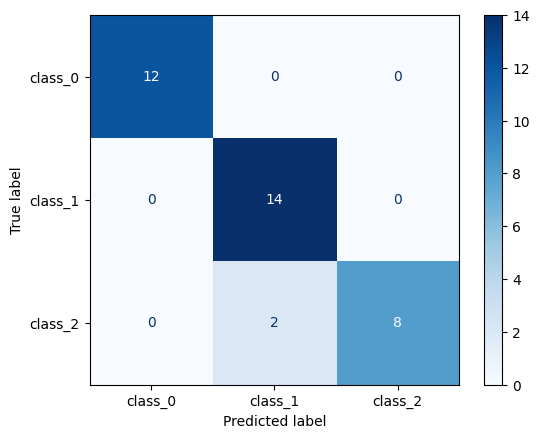

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score

# 1) Treinar e avaliar o baseline no TESTE
baseline = modelos["Baseline_Dummy"]
baseline.fit(X_train, y_train)
y_pred_base = baseline.predict(X_test)

print("=== Baseline (DummyClassifier) ===")
print(classification_report(y_test, y_pred_base, digits=3))

# 2) Avaliar o MELHOR modelo já obtido no tuning
y_pred_best = best_est.predict(X_test)

print(f"\n=== Melhor Modelo: {best_name} ===")
print(classification_report(y_test, y_pred_best, digits=3))

# 3) Comparação rápida das métricas principais
comp_df = pd.DataFrame({
    "Modelo": ["Baseline", best_name],
    "Accuracy": [accuracy_score(y_test, y_pred_base), accuracy_score(y_test, y_pred_best)],
    "F1_macro": [f1_score(y_test, y_pred_base, average="macro"), f1_score(y_test, y_pred_best, average="macro")]
})
print("\n=== Comparação Baseline vs Melhor Modelo ===")
print(comp_df)

# 4) Análise de erros: Matriz de confusão
print("\n=== Matriz de Confusão (Melhor Modelo) ===")
cm = confusion_matrix(y_test, y_pred_best)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=wine.target_names)
disp.plot(cmap="Blues", values_format="d")

##Conclusão.
O problema de classificação aplicado ao dataset Wine demonstrou, de forma prática, como algoritmos de Machine Learning podem aprender a diferenciar categorias com base em atributos numéricos. A comparação entre o baseline (DummyClassifier) e os modelos otimizados evidenciou ganhos significativos em métricas como accuracy e F1-macro, reforçando a importância do pré-processamento adequado e da escolha criteriosa dos algoritmos. Apesar dos bons resultados, observamos que ainda existem erros de classificação, principalmente em classes mais próximas quimicamente, o que reflete as limitações do dataset e do modelo.